# 1. Linear Regression
### 공부시간에 따른 시험 점수

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [10]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [11]:
X = dataset.iloc[:,:-1].values # 처음부터 마지막 칼럼 직전까지의 데이터(독립변수)
y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터(종속변수 - 결과)

In [13]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체생성
reg.fit(X,y)  # 학습(모델 생성)

LinearRegression()

In [15]:
y_pred = reg.predict(X) # X에 대한 예측값

In [16]:
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

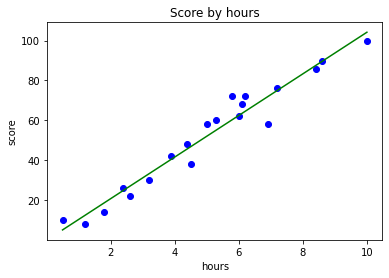

In [17]:
plt.scatter(X,y,color = 'blue') # 산점도
plt.plot(X,y_pred, color = 'green') # 선 그래프
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [19]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) #[9], [8], [7]

9시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [20]:
reg.coef_ # 기울기

array([10.44369694])

In [21]:
reg.intercept_ # y절편

-0.21848470286721522

y = 10.4436x - 0.2184

### 데이터 세트 분리

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0) 

In [28]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [29]:
X_train, len(X_train) # 훈련세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [30]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [31]:
y,len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [32]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [33]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [35]:
reg.fit(X_train,y_train) # 훈련세트 학습

LinearRegression()

### 데이터 시각화(훈련 데이터)

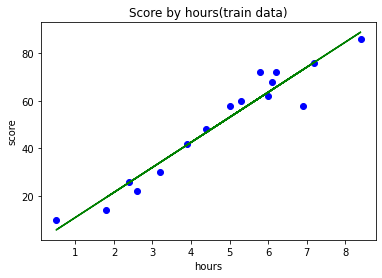

In [37]:
plt.scatter(X_train,y_train,color = 'blue') # 산점도
plt.plot(X_train,reg.predict(X_train), color = 'green') # 선 그래프
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(테스트 세트)

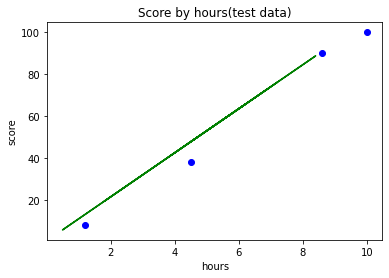

In [38]:
plt.scatter(X_test,y_test,color = 'blue') # 산점도
plt.plot(X_train,reg.predict(X_train), color = 'green') # 선 그래프
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [39]:
reg.coef_

array([10.49161294])

In [40]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [41]:
reg.score(X_test, y_test)

0.9727616474310156

In [43]:
reg.score(X_train, y_train)

0.9356663661221668

### 경사 하강법 (Gradient Descent)

max_iter : 훈련세트 반복 횟수(Epoch횟수)

eta0 : 학습률(learning rate) 학습하는 속도(클수록 빠르고 작을수록 느림)

In [30]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent

# 지수표기법
# 1e-3 : 0.001
# 1e-4 : 0.0001
# 1e+3 : 1000
# 1e+4 : 10000

# sr = SGDRegressor(max_iter=500, eta0 = 1e-4, random_state=0, verbose=1)
# SGDRegressor 안에 특정 항목들 조정가능함!
sr = SGDRegressor()
sr.fit(X_train,y_train)

SGDRegressor()

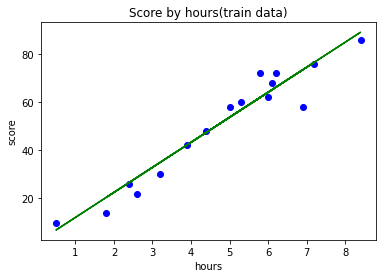

In [31]:
plt.scatter(X_train,y_train,color = 'blue') # 산점도
plt.plot(X_train,sr.predict(X_train), color = 'green') # 선 그래프
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [11]:
sr.coef_

array([10.18182869])

In [12]:
sr.intercept_

array([1.67484647])

In [15]:
sr.score(X_test,y_test) # 테스트 세트를 통한 모델 평가

0.9757867407540205